In [1]:
#Loading Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from sklearn.model_selection import train_test_split

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

#Model Selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics



In [2]:
#Getting Data
train_demo=pd.read_excel(r"C:\Users\david\Documents\GitHub\TheSmithParasiteNOVA\Data\train_demo.xlsx")
train_habits=pd.read_excel(r"C:\Users\david\Documents\GitHub\TheSmithParasiteNOVA\Data\train_habits.xlsx")
train_health=pd.read_excel(r"C:\Users\david\Documents\GitHub\TheSmithParasiteNOVA\Data\train_health.xlsx")

test_demo=pd.read_excel(r"C:\Users\david\Documents\GitHub\TheSmithParasiteNOVA\Data\test_demo.xlsx")
test_habits=pd.read_excel(r"C:\Users\david\Documents\GitHub\TheSmithParasiteNOVA\Data\test_habits.xlsx")
test_health=pd.read_excel(r"C:\Users\david\Documents\GitHub\TheSmithParasiteNOVA\Data\test_health.xlsx")

test_y = pd.read_csv(r"Pred_score_1.csv")


#print(t_demo.info(), t_habits.info(), t_health.info())

In [3]:
#Merging the table into one using the patient ID

df_train=pd.merge(pd.merge(train_demo,train_habits,on='PatientID'),train_health,on='PatientID')
df_test=pd.merge(pd.merge(test_demo,test_habits,on='PatientID'),test_health,on='PatientID')

#Set index to patient ID
df_train.set_index('PatientID', inplace = True)
df_test.set_index('PatientID', inplace = True)
df_train.head()
df_test.head()


,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes
1828,Mr. Robert Foreman,1978,West Midlands,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,171,78,237,130,24,1,More than 3 years,I have/had pregnancy diabetes or borderline di...
1155,Mr. Edwin Ferguson,1968,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Less than half a liter,174,87,313,108,19,0,Not sure,I do have diabetes
1020,Mr. Eliseo Krefft,1962,East Midlands,High School Incomplete (10th to 11th grade),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Less than half a liter,172,56,189,140,19,14,More than 3 years,I have/had pregnancy diabetes or borderline di...


# Data Exploration

In [4]:
#Explore all the columns
df_train.columns 

Index(['Name', 'Birth_Year', 'Region', 'Education', 'Disease', 'Smoking_Habit',
       'Drinking_Habit', 'Exercise', 'Fruit_Habit', 'Water_Habit', 'Height',
       'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health',
       'Physical_Health', 'Checkup', 'Diabetes'],
      dtype='object')

In [5]:
#Get Overview ovwe df_train -> NaN values in education
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [6]:
#Get an overview over all numeric variables
#min birth year seems odd
df_train.describe(include=None) 

,Birth_Year,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,1966.043750,0.513750,167.806250,67.82750,249.322500,131.053750,17.345000,4.558750
std,15.421872,0.500124,7.976888,12.11347,51.566631,17.052693,5.385139,5.449189
min,1855.000000,0.000000,151.000000,40.00000,130.000000,94.000000,0.000000,0.000000
25%,1961.000000,0.000000,162.000000,58.00000,213.750000,120.000000,13.000000,0.000000
50%,1966.000000,1.000000,167.000000,68.00000,244.000000,130.000000,18.000000,3.000000
75%,1974.000000,1.000000,173.000000,77.00000,280.000000,140.000000,21.000000,7.000000
max,1993.000000,1.000000,180.000000,97.00000,568.000000,200.000000,29.000000,30.000000


In [7]:
#All non numerc variables
#Education has null values
df_train.describe(include="object") 

,Name,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Checkup,Diabetes
count,800,800,787,800,800,800,800,800,800,800
unique,799,10,6,2,3,2,5,3,4,4
top,Mr. Gary Miller,East Midlands,University Complete (3 or more years),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,More than 3 years,Neither I nor my immediate family have diabetes.
freq,2,154,239,673,406,536,452,364,429,392


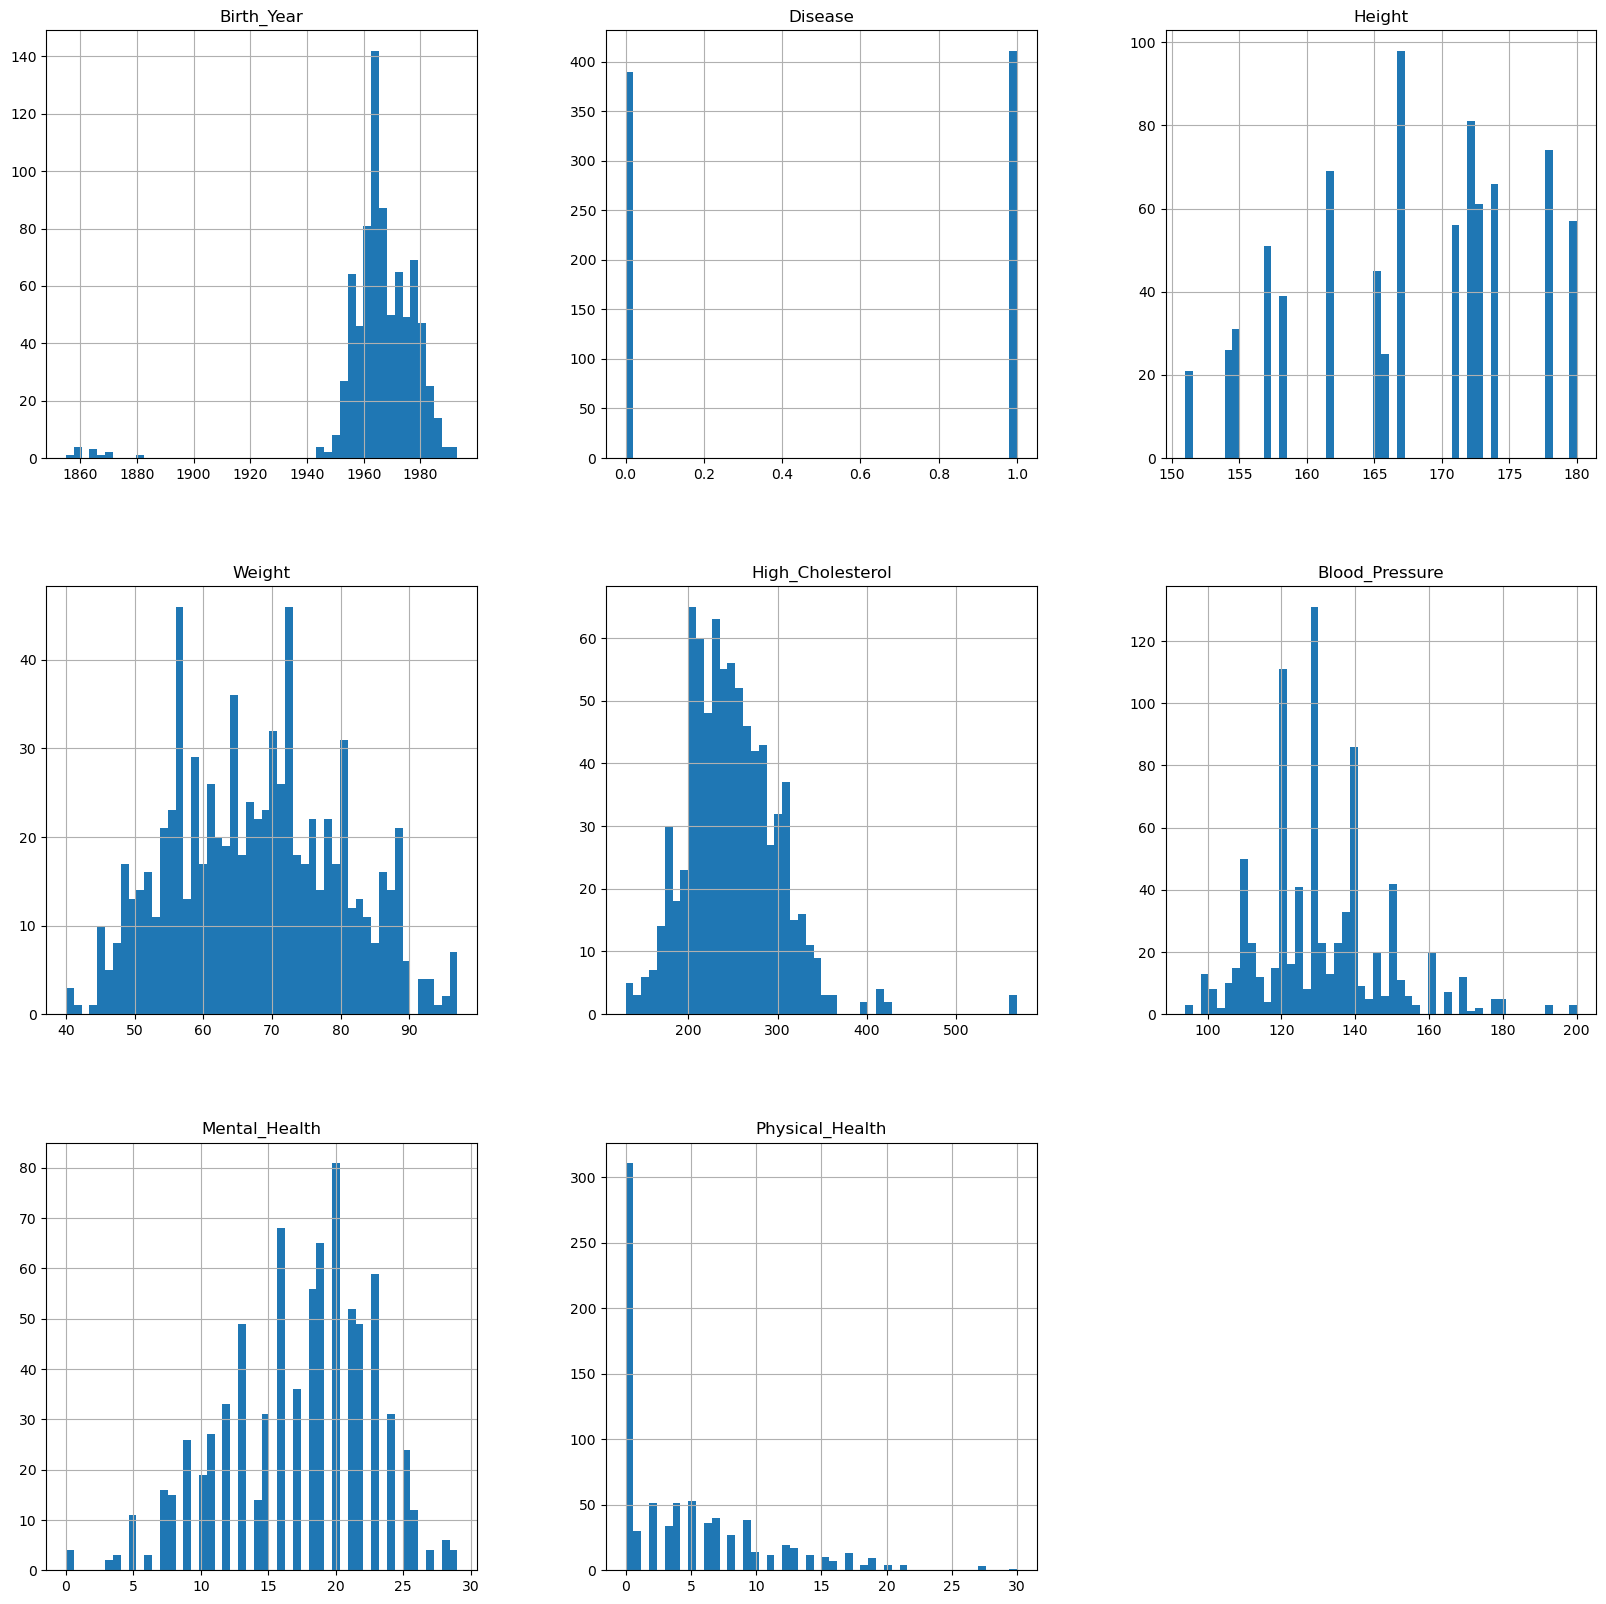

In [8]:
%matplotlib inline
df_train.hist(bins=50, figsize=(20,20))
plt.show()

In [9]:
df_train.isnull().sum()


Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

<AxesSubplot:>

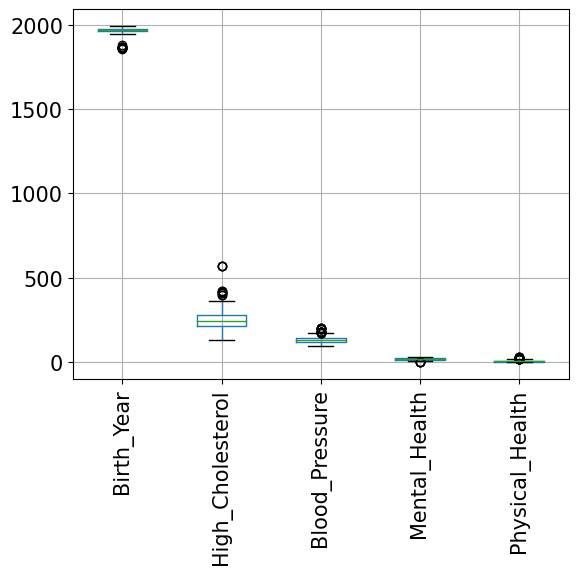

In [10]:
#Creating a function to get the columns which contain outliers

def outlier_cols(dafra):

    num_col=list(dafra.select_dtypes(include=np.number).columns)
    res = []
    for x in num_col:
        q75,q25 = np.percentile(dafra.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        if dafra.loc[dafra[x] < min,x].empty == False or dafra.loc[dafra[x] > max,x].empty == False:
            res.append(x)
    return res
out_col=outlier_cols(df_train) 
df_train.boxplot(out_col,rot=90, fontsize=15)

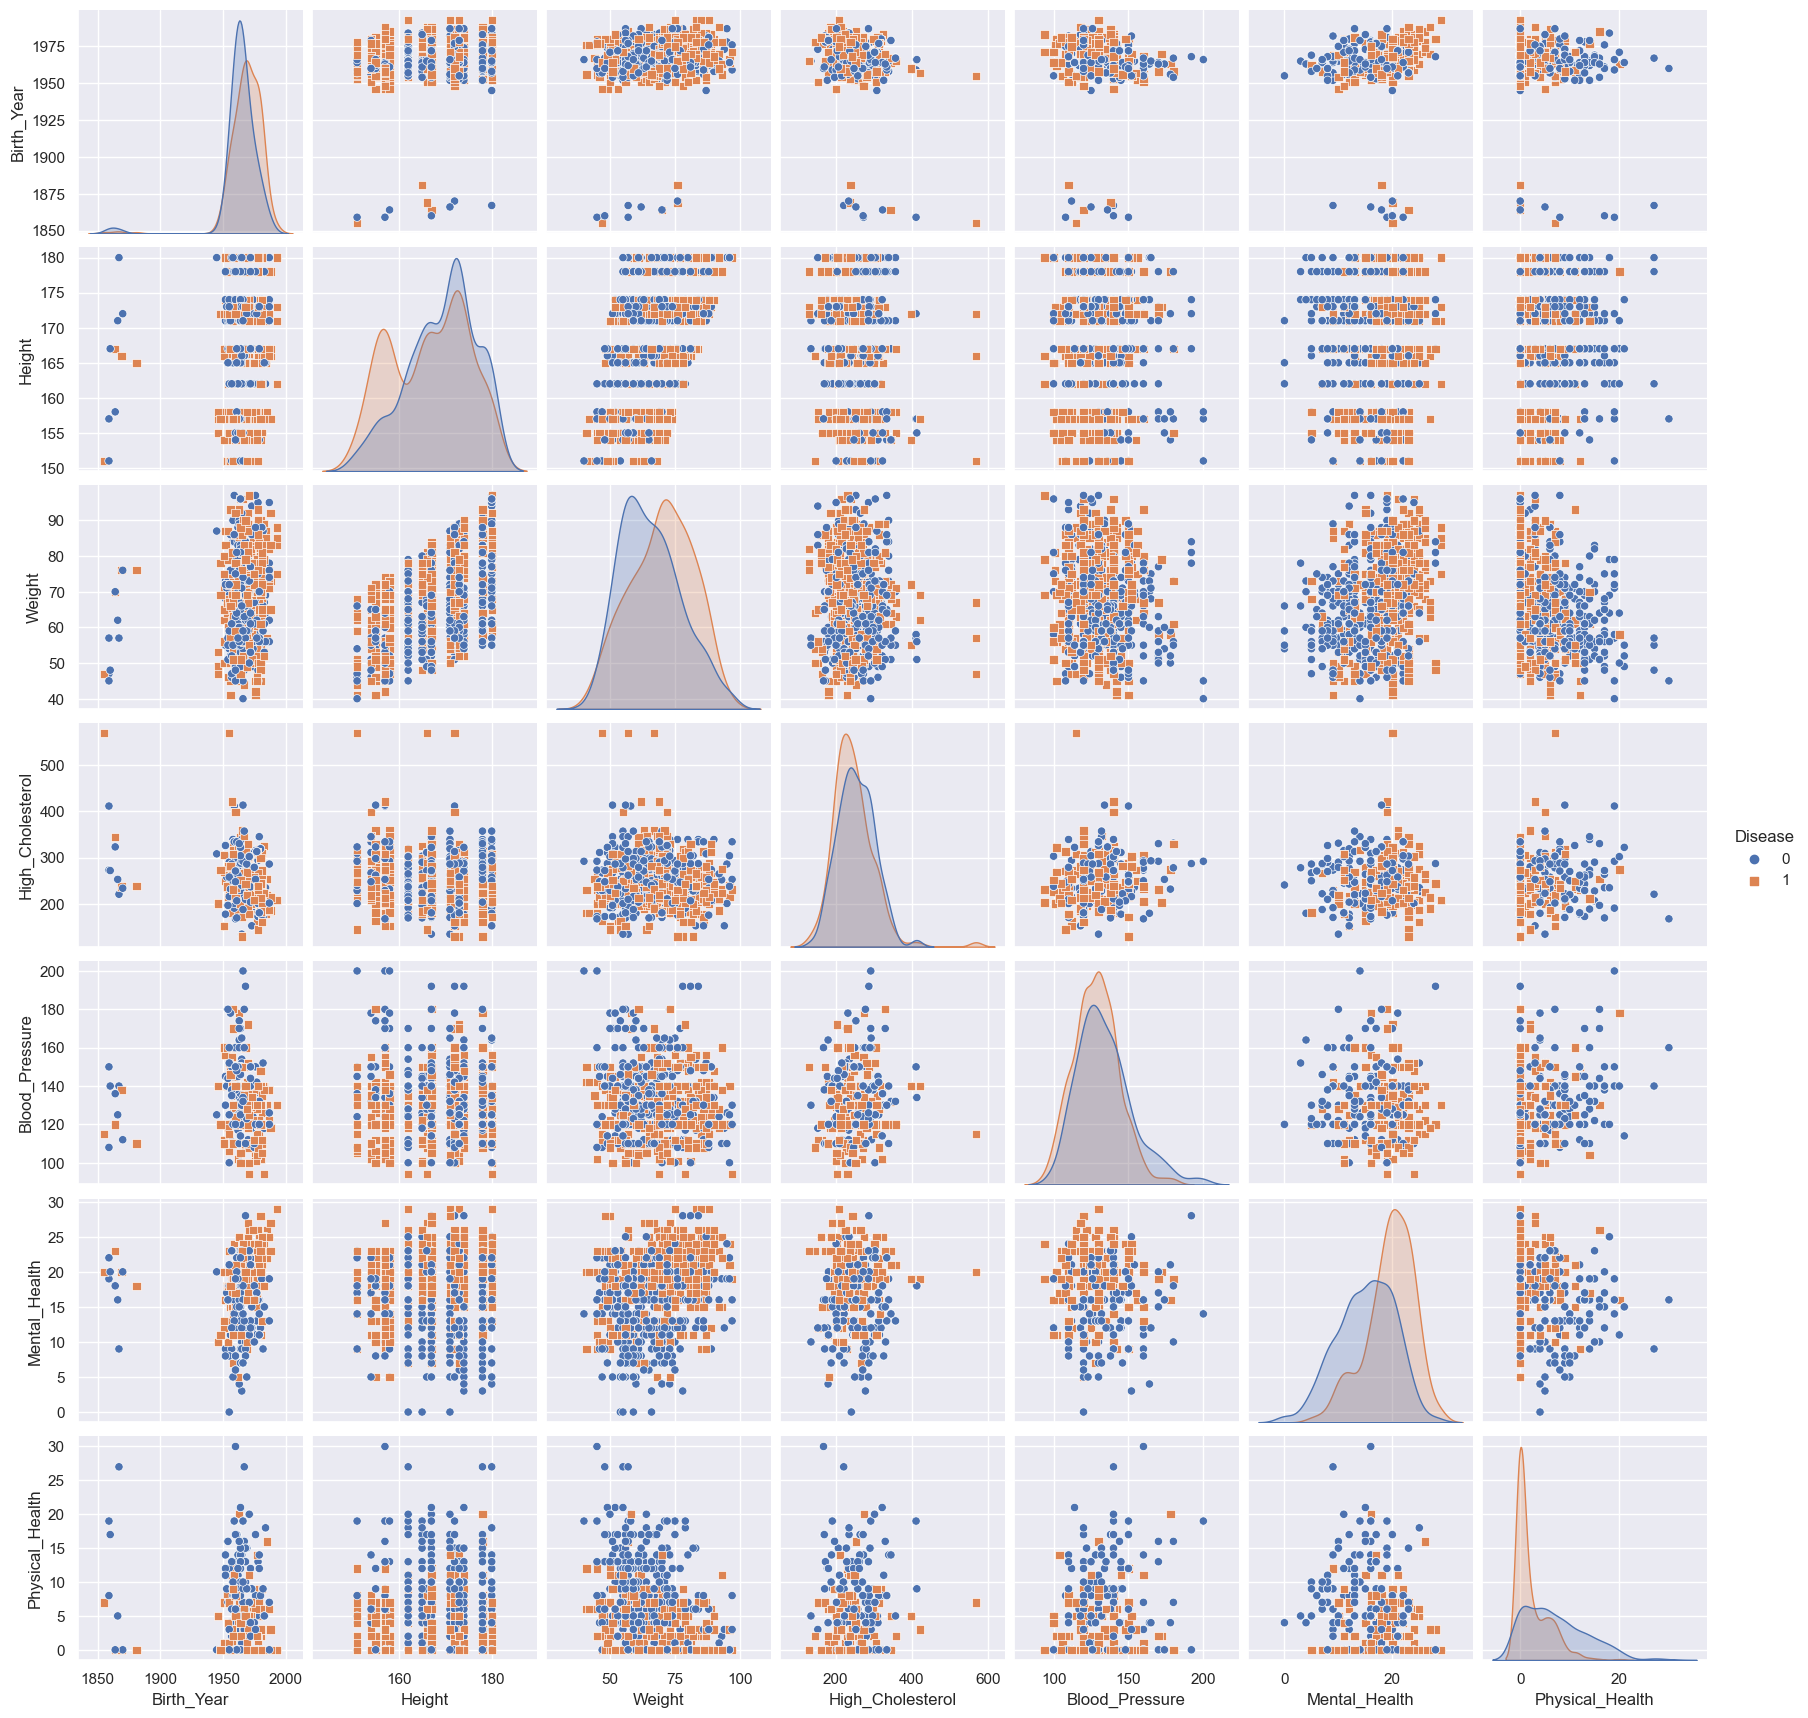

In [11]:
sns.set()

sns.pairplot(df_train, hue = 'Disease', markers = ['o', 's'])

In [12]:
df_train["Education"].head()#Change education into a numeric variable

PatientID
1167    High School Incomplete (10th to 11th grade)
1805    High School Incomplete (10th to 11th grade)
1557           Elementary School (1st to 9th grade)
1658          University Complete (3 or more years)
1544           University Incomplete (1 to 2 years)
Name: Education, dtype: object

In [13]:
df_train["Smoking_Habit"].head()#Change education into a boolean variable

PatientID
1167    No
1805    No
1557    No
1658    No
1544    No
Name: Smoking_Habit, dtype: object

In [14]:
df_train["Drinking_Habit"].head()#Encode the values of drinking habit
df_train["Drinking_Habit"].unique()

array(['I usually consume alcohol every day',
       'I consider myself a social drinker',
       'I do not consume any type of alcohol'], dtype=object)

# Data Preprocessing & Variable Definition

## Data Preprocessing  Function
### For the final test set

In [15]:
#Things to try
#ordinal encoding
#treat every outlier differently?
#categorical embedding


def preprocessing(dataframe):

    # fix Birth_Year errors
    # try imputer 
    dataframe['Birth_Year'] = [i + 100 if i < 1900 else i for i in dataframe['Birth_Year']]

    # add Age column
    dataframe['Age'] = [2022 - i for i in dataframe['Birth_Year']]

    # add Gender column (1: Male, 0: Female)
    # afterwards drop column Name
    dataframe['Gender']  = [1 if i.split(' ')[0] == 'Mr.' else 0 for i in dataframe['Name']]
    dataframe.drop(columns = ['Name'], inplace = True)

    # add column population density
    dataframe['Region'] = [i.lower() for i in dataframe['Region']]
    dataframe['Region_Density'] = [dataframe['Region'].value_counts(normalize = True)[i] for i in dataframe['Region']]

    # encode Smoking_Habit & Exercise to binary (1: Yes, 0: No)
    dataframe['Smoking_Habit'] = [1 if i == 'Yes' else 0 for i in dataframe['Smoking_Habit']]
    dataframe['Exercise'] = [1 if i == 'Yes' else 0 for i in dataframe['Exercise']]
    
    #iterate through the columns with outliers and replace them with the whisker values
    for i in out_col:
        Q1 = dataframe[i].quantile(0.25)
        Q3 = dataframe[i].quantile(0.75)
        IQR = Q3 - Q1
        whisker_width = 1.5
        lower_whisker = Q1 -(whisker_width*IQR)
        upper_whisker = Q3 + (whisker_width*IQR)
        dataframe[i]=np.where(dataframe[i]>upper_whisker,upper_whisker,np.where(dataframe[i]<lower_whisker,lower_whisker,dataframe[i]))
    
    dataframe=pd.get_dummies(dataframe, columns =["Education"])
    
     # split x in numeric and categorical features
    xnumeric, xcategorical = dataframe.select_dtypes(include = np.number), dataframe.select_dtypes(exclude = np.number)
    
    #Impute the missing values in the column "Education" with the nearest neighbours
    fill_NaN = KNNImputer(missing_values=np.nan)
    imputed_DF = pd.DataFrame(fill_NaN.fit_transform(xnumeric))
    imputed_DF.columns = xnumeric.columns
    imputed_DF.index = xnumeric.index
    xnumeric = imputed_DF

    # One-hot-encoding categorical features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_cat_encoded = pd.DataFrame(encoder.fit_transform(xcategorical).toarray(), columns = encoder.get_feature_names_out(), index = xcategorical.index) 
    

    xpreprocessed = pd.concat([xnumeric, x_cat_encoded], axis = 1)

    return xpreprocessed


In [16]:
#Test function with MINMAX Sclaer
X, y = df_train.drop(columns = ['Disease']), df_train['Disease']
X = preprocessing(X)

y = y.loc[df_train.index]

X.head()

,Birth_Year,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,...,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Checkup_Less than 3 years but more than 1 year,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,1965.0,0.0,1.0,155.0,67.0,358.0,120.0,21.0,2.0,57.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1805,1969.0,0.0,1.0,173.0,88.0,230.0,142.0,9.0,0.0,53.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1557,1974.0,0.0,0.0,162.0,68.0,226.0,122.0,26.0,0.0,48.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1658,1958.0,0.0,1.0,180.0,66.0,313.0,125.0,13.0,8.0,64.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1544,1968.0,0.0,0.0,180.0,58.0,277.0,125.0,18.0,2.0,54.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Splitting and Cleaning Data
## Hold one out Method

In [17]:
# #Dependent and independent variable
# X = df_train.drop('Disease', axis = 1) #Axis 1 -> columns
# y = df_train['Disease']

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                  test_size = 0.3,#validation 30%
                                                  random_state = 0,#Seed
                                                  stratify = y,
                                                  shuffle = True)#Could be sorted or grouped-get more randomness

In [19]:
#put together for correlation
all_train_num = X_train.join(y_train)
all_train_num.head()

,Birth_Year,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,...,Water_Habit_More than half a liter but less than one liter,Checkup_Less than 3 years but more than 1 year,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Disease
PatientID,,,,,,,,,,,,,,,,,,,,,
1262,1974.0,0.0,0.0,165.0,71.0,226.0,122.0,26.0,0.0,48.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1532,1959.0,0.0,1.0,157.0,55.0,201.0,124.0,14.0,0.0,63.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1350,1956.0,0.0,0.0,174.0,57.0,306.0,120.0,18.0,1.0,66.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1276,1965.0,0.0,1.0,178.0,81.0,211.0,132.0,22.0,0.0,57.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1142,1961.0,0.0,0.0,171.0,67.0,238.0,134.0,16.0,12.0,61.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


# Feature Selection

In [20]:
#No univariate variables
X_train.var()

Birth_Year                                                                               78.736213
Smoking_Habit                                                                             0.145793
Exercise                                                                                  0.223994
Height                                                                                   65.401607
Weight                                                                                  150.624585
High_Cholesterol                                                                       2075.767729
Blood_Pressure                                                                          267.689084
Mental_Health                                                                            29.870275
Physical_Health                                                                          24.539381
Age                                                                                      78.736213
Gender    

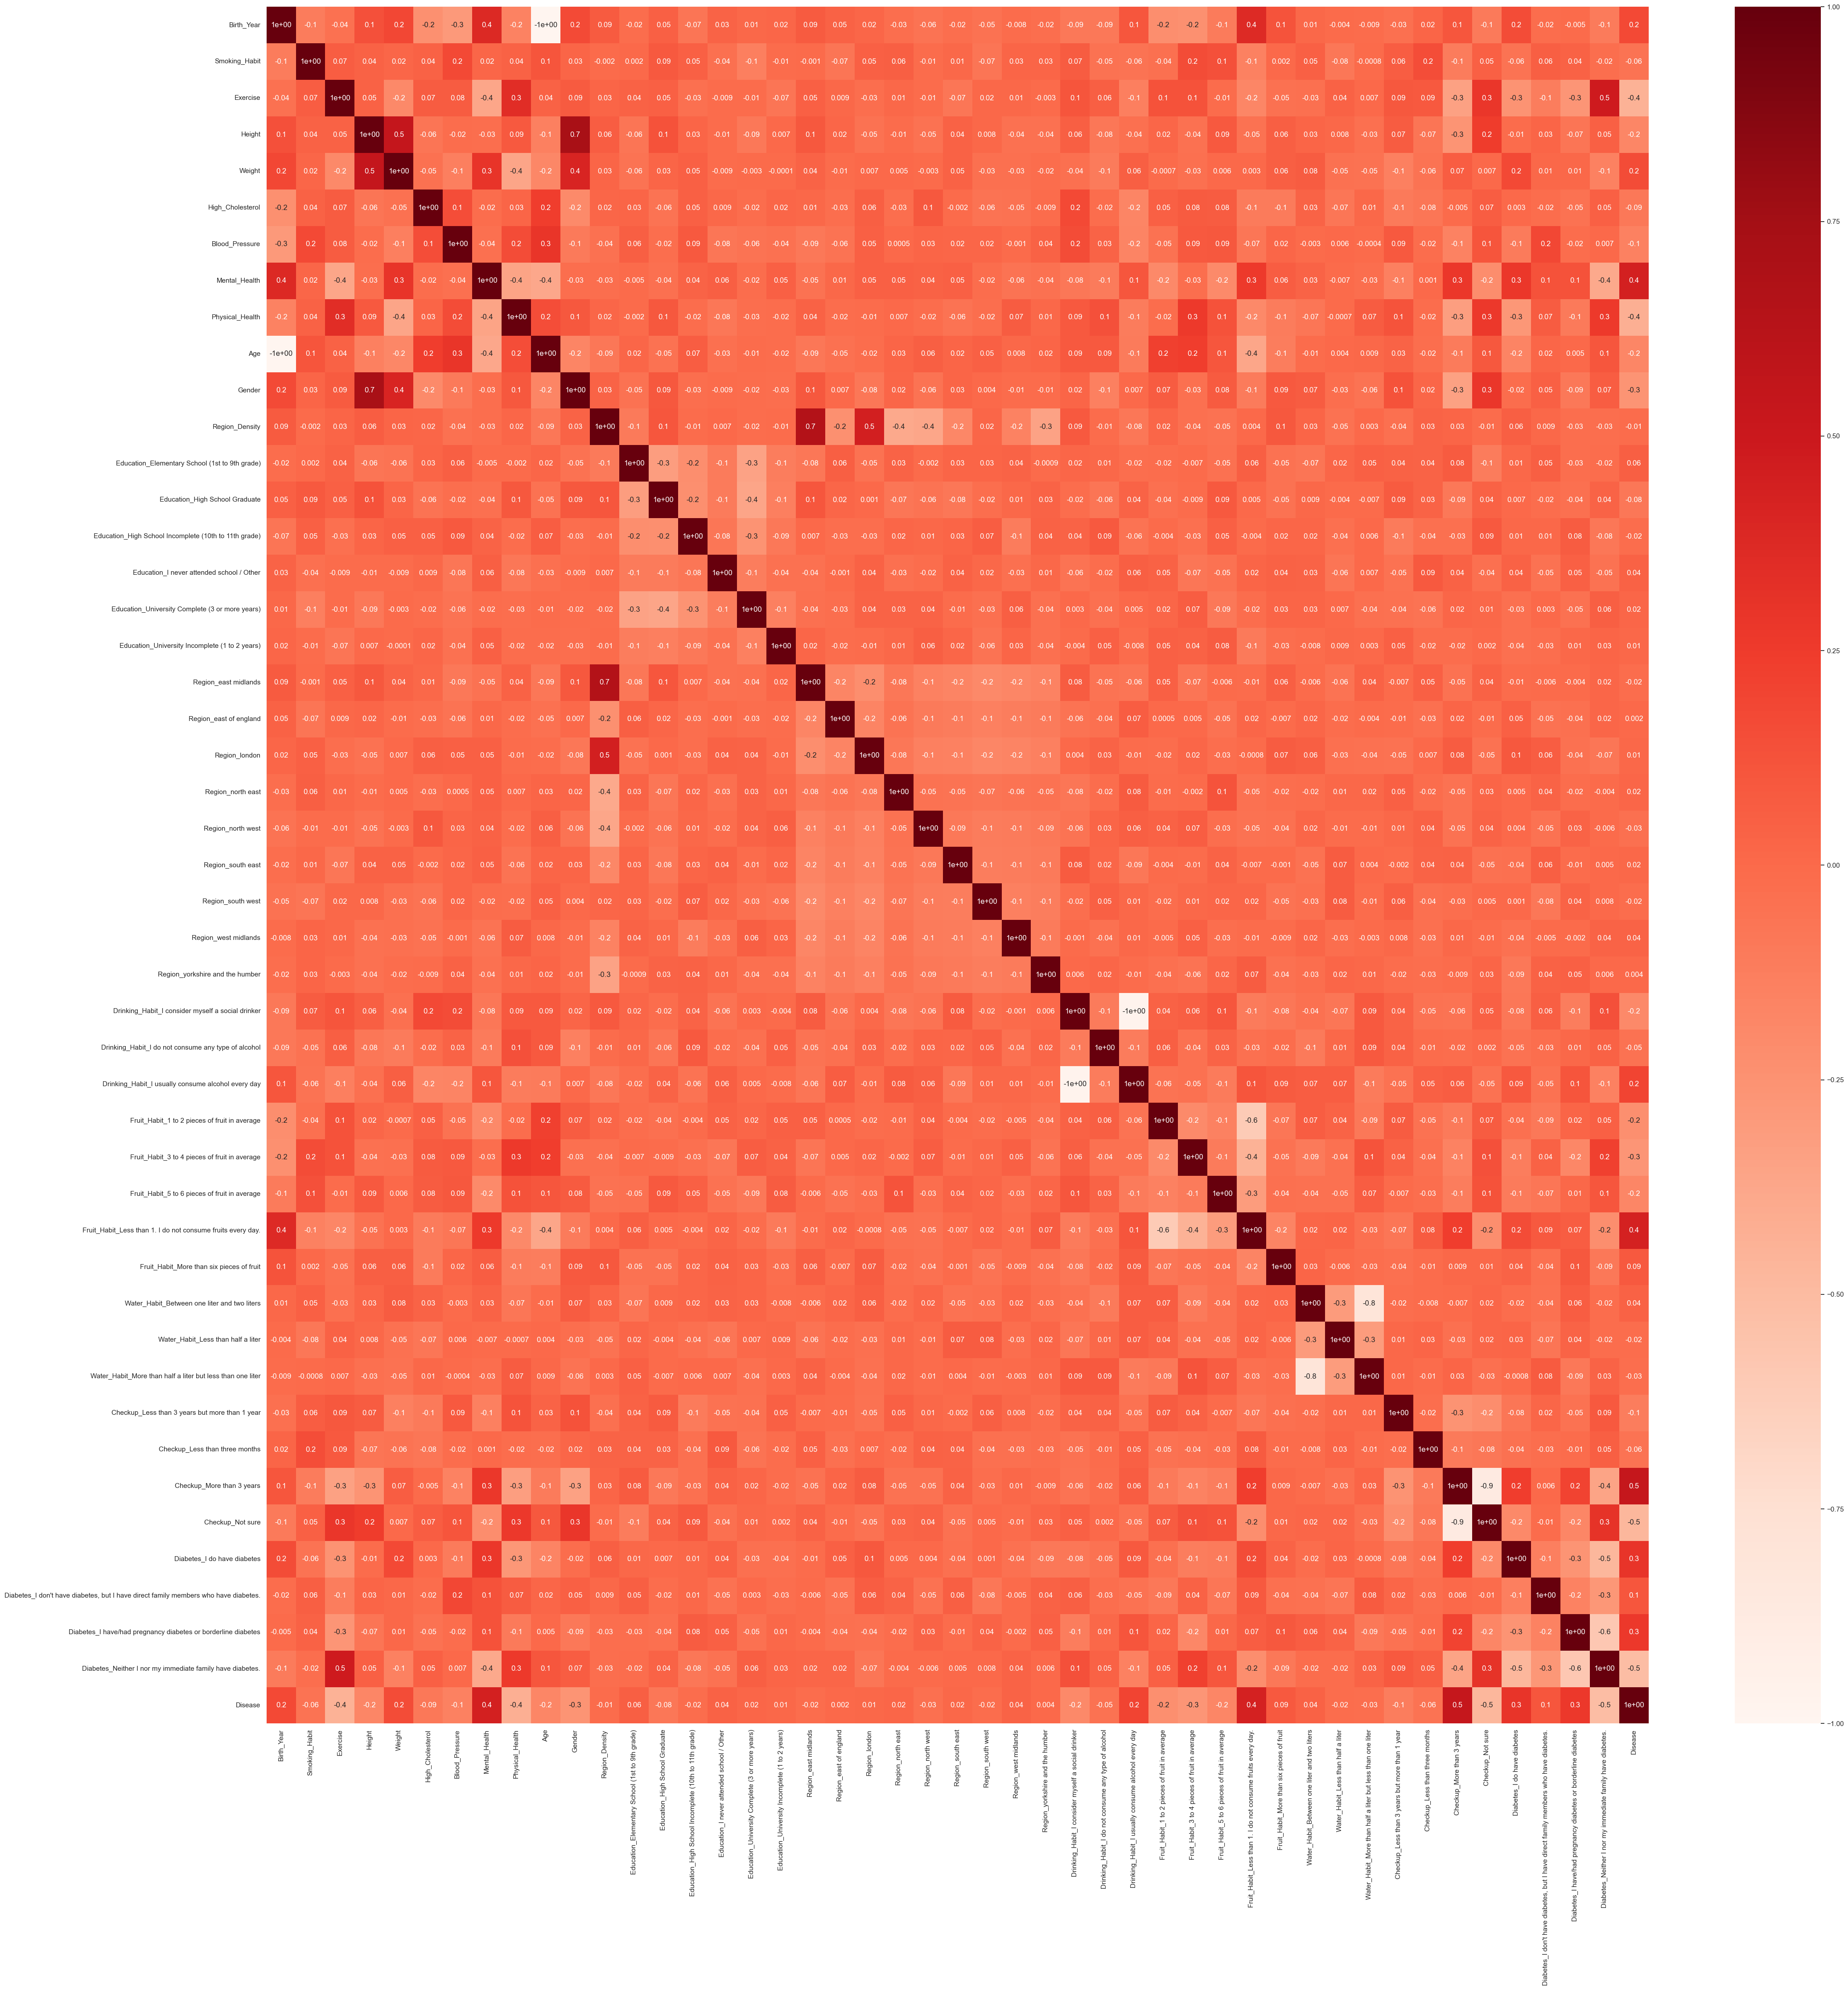

In [21]:
#define a heatmap 
def cor_heatmap(cor):
    plt.figure(figsize=(50,50))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
cor_spearman = cor_heatmap(all_train_num.corr("pearson"))
#no really strong correlation with the dependent variable

In [22]:
pearson_disease=all_train_num.corr("pearson")["Disease"].sort_values()
pearson_coef=pearson_disease[(pearson_disease<0.1) & (pearson_disease>-0.1)]

In [23]:
# #Chi squared for the cat-data
# def TestIndependence(X,y,var,alpha=0.05):        
#     dfObserved = pd.crosstab(y,X) 
#     chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
#     dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
#     if p<alpha:
#         result="{0} is IMPORTANT for Prediction".format(var)
#     else:
#         result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
#     print(result)

In [24]:
# for var in X_train:
#     TestIndependence(X_train[var],y_train, var)


# #Name and region can get out
# #X_train = X_train.drop(["Name", "Region"],axis = 1 )
# #X_val = X_val.drop(["Name", "Region"],axis = 1 )

# #does the combination bring any value

# Embedded Feature Selection: Lasso Regression

In [25]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [26]:
reg = LassoCV()
reg.fit(X_train, y_train)
coef = pd.Series(reg.coef_, index = X_train.columns)

In [27]:
print(coef.sort_values())
print("Lasso picked:", str(sum(coef != 0)), "variables, and eliminated", str(sum(coef == 0)))

#

Diabetes_Neither I nor my immediate family have diabetes.                             -0.220187
Gender                                                                                -0.189175
Fruit_Habit_3 to 4 pieces of fruit in average                                         -0.072928
Checkup_Not sure                                                                      -0.059853
Exercise                                                                              -0.059352
Fruit_Habit_1 to 2 pieces of fruit in average                                         -0.043504
Education_High School Incomplete (10th to 11th grade)                                 -0.037619
Education_High School Graduate                                                        -0.026654
Region_london                                                                         -0.018670
Water_Habit_Less than half a liter                                                    -0.013228
Physical_Health                         

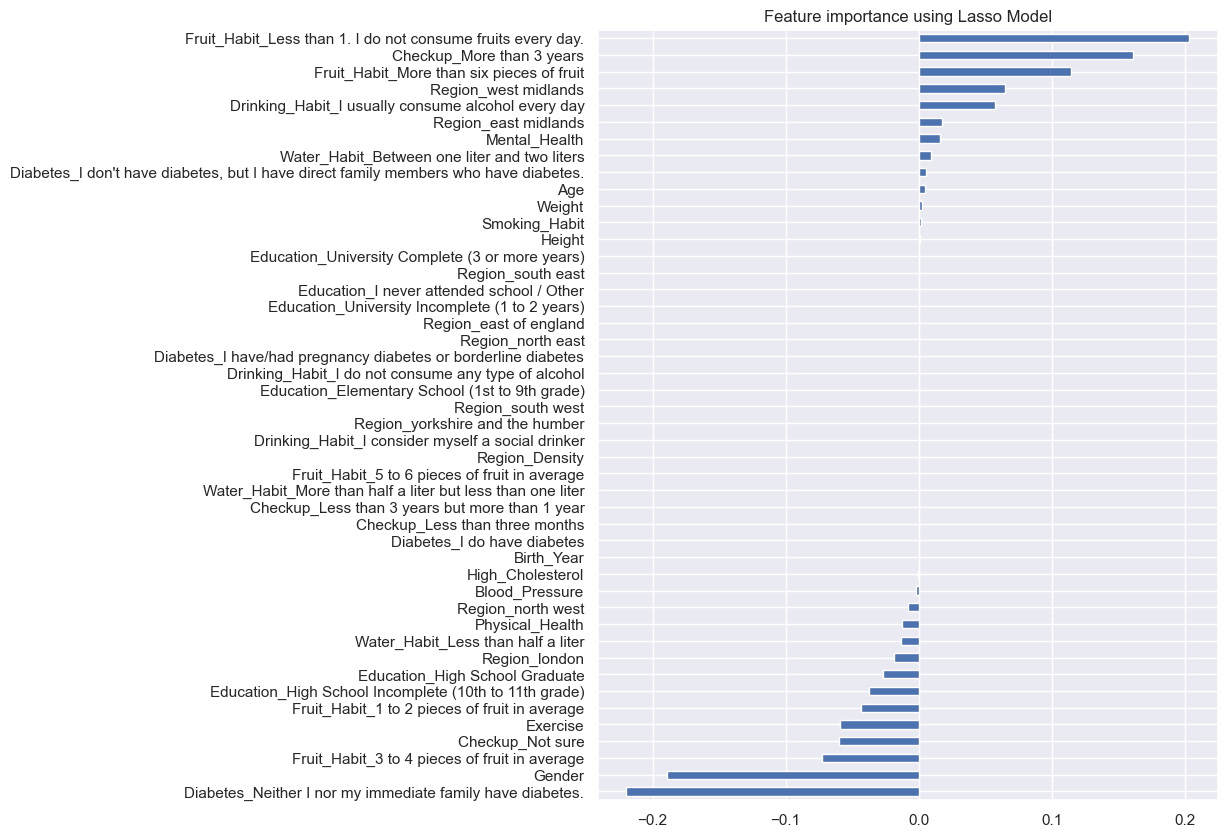

In [28]:
plot_importance(coef, "Lasso")

# Model Selection
## LOO Method 

In [29]:
print('train:{}% | validation:{}%'.format(round(len(y_train)/len(y),2),
                                                     round(len(y_val)/len(y),2),
                                                     #round(len(y_test)/len(y),2)
                                                    ))

train:0.7% | validation:0.3%


In [30]:
#Variable Selection -> throw out everything that is not necessary
lasso_var=coef[coef==0].index
 
X_train = X_train.drop(lasso_var,axis = 1)
X_val =X_val.drop(lasso_var,axis = 1)

In [31]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [32]:
def f_test_comp(raw_data, classifiers, scales):
    for name_sc, scale in scaler.items():
    
        #Preprocessing with the given Scaler
        X, y = raw_data.drop(columns = ['Disease']), raw_data['Disease']
        X = preprocessing(X)
        y = y.loc[raw_data.index]
        #Splitting the data
        X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                  test_size = 0.2,#validation 30%
                                                  random_state = 0,#Seed
                                                  stratify = y,
                                                  shuffle = True)#Could be sorted or grouped-get more randomness
        #Variable Reduction: Lasso Regression
        reg = LassoCV()
        reg.fit(X_train, y_train)
        coef = pd.Series(reg.coef_, index = X_train.columns)
        #coef[coef==0].index

        drop_coef=pearson_coef.index
        
        X_train = X_train.drop(drop_coef,axis = 1)
        X_val =X_val.drop(drop_coef,axis = 1)
        max_f1_val=0
        max_f1_train=0
        
        #Apply different classifiers on the preprocessed data
        for name, clf in classifiers.items():
            model=clf.fit(X_train, y_train)
            
            #Predict values and look at the f1 scores
            pred_val = model.predict(X_val)
            pred_train = model.predict(X_train)
            f1_val = f1_score(y_val, pred_val)
            f1_train =f1_score(y_train, pred_train)
            
            #Save the Max F1 Value 
            if max_f1_val < f1_val:
                max_f1_val = f1_val
                max_f1_train = f1_train
                max_name_class = name

        print(name_sc, max_name_class, "F1 val:", round(max_f1_val,2), "F1 train", round(max_f1_train,2))
        

In [33]:
# classifiers = {
#                 'Logistic Regression': LogisticRegression(random_state = 12),
#                 'SVM': SVC(random_state = 13),
#                 'Neural Network': MLPClassifier(max_iter = 1000, random_state = 14),
#                 'Decision Tree': DecisionTreeClassifier(random_state = 15),
#                 'Random Forest': RandomForestClassifier(random_state = 16), 
#                 "Gradient Booster":GradientBoostingClassifier(random_state = 19), 
#                 "Naive Baies":GaussianNB()
#             }

# scaler_dict={"Standard_Scaler":StandardScaler(), 
#              "MinMax": MinMaxScaler(), 
#              "Robust Scaler": RobustScaler()}



# f_test_comp(df_train, classifiers, scaler_dict)

# Model Selection
# K Fold Method

In [34]:
# #As we concluded from the Hold one Out Method 
# #The Random Forest gives the best results

# #Define a Classifier to test
# LGR = RandomForestClassifier()
# #get the F1 scores utilizing cross validation
# score_val={}

# for name, clf in classifiers.items():
#     sc_list=[]
    
#     for i in range(2, 20):
#         scores = cross_val_score(clf, X, y, cv=i, scoring='f1')
#         sc_list.append(scores.mean())

#     score_val[name]=scores.max()
    
# score_val

In [35]:
X

,Birth_Year,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,...,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Checkup_Less than 3 years but more than 1 year,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,1965.0,0.0,1.0,155.0,67.0,358.0,120.0,21.0,2.0,57.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1805,1969.0,0.0,1.0,173.0,88.0,230.0,142.0,9.0,0.0,53.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1557,1974.0,0.0,0.0,162.0,68.0,226.0,122.0,26.0,0.0,48.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1658,1958.0,0.0,1.0,180.0,66.0,313.0,125.0,13.0,8.0,64.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1544,1968.0,0.0,0.0,180.0,58.0,277.0,125.0,18.0,2.0,54.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,1972.0,0.0,1.0,178.0,61.0,204.0,144.0,12.0,4.0,50.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1386,1980.0,0.0,0.0,157.0,61.0,213.0,120.0,23.0,0.0,42.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1088,1960.0,0.0,0.0,167.0,48.0,272.0,140.0,20.0,17.0,62.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [36]:
#Model 1 Gaussian
model = GaussianNB().fit(X_train, y_train)
pred_val = model.predict(X_val)
pred_train = model.predict(X_train)
#f1_val = f1_score(y_val, y_pred)

metrics(y_train, pred_train, y_val, pred_val)
#f1_score(y_val, pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       272
           1       0.86      0.86      0.86       288

    accuracy                           0.86       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.86      0.86       560

[[231  41]
 [ 40 248]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [37]:
#Model 2: Logistic Regression
model = LogisticRegression().fit(X_train, y_train)
pred_val = model.predict(X_val)

pred_train = model.predict(X_train)
#f1_val = f1_score(y_val, y_pred)

metrics(y_train, pred_train, y_val, pred_val)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       272
           1       0.85      0.89      0.87       288

    accuracy                           0.86       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.86      0.86       560

[[226  46]
 [ 31 257]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [38]:
#Model 3: Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
pred_val = model.predict(X_val)
pred_train = model.predict(X_train)

metrics(y_train, pred_train, y_val, pred_val)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       272
           1       0.95      0.95      0.95       288

    accuracy                           0.95       560
   macro avg       0.95      0.95      0.95       560
weighted avg       0.95      0.95      0.95       560

[[258  14]
 [ 13 275]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [39]:
#Model 4: Random Forest

rf_model = RandomForestClassifier(random_state=2).fit(X_train, y_train)
pred_val = rf_model.predict(X_val)
pred_train = rf_model.predict(X_train)

metrics(y_train, pred_train, y_val, pred_val)


#Random Forest Theory nachlesen

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       288

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[272   0]
 [  0 288]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

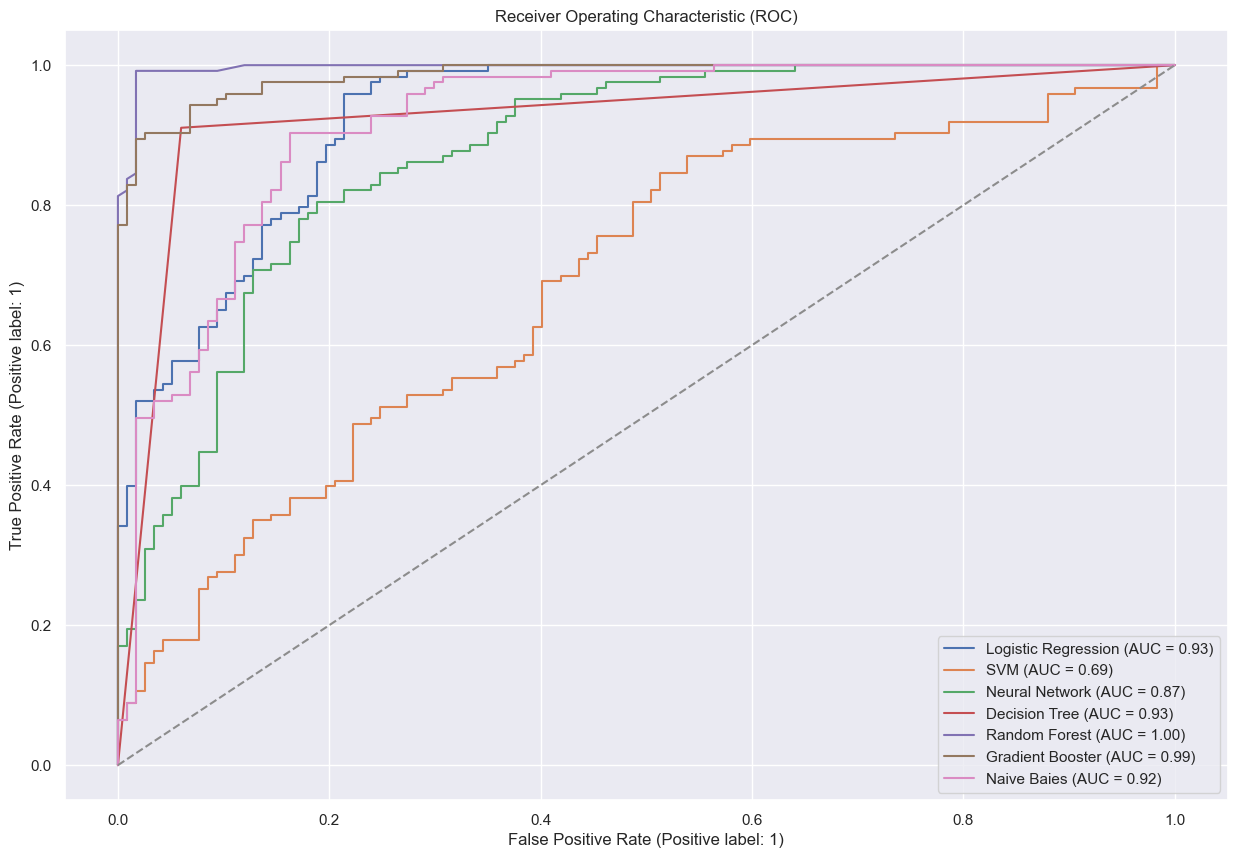

In [42]:
#Show Area under the Curve for used classfiers
classifiers = {
                'Logistic Regression': LogisticRegression(random_state = 12),
                'SVM': SVC(random_state = 13),
                'Neural Network': MLPClassifier(max_iter = 1000, random_state = 14),
                'Decision Tree': DecisionTreeClassifier(random_state = 15),
                'Random Forest': RandomForestClassifier(random_state = 16), 
                "Gradient Booster":GradientBoostingClassifier(random_state = 19), 
                "Naive Baies":GaussianNB()}

def roc_auc(classifiers):
    fig, ax = plt.subplots(1, figsize=(15, 10))
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        RocCurveDisplay.from_estimator(clf, X_val, y_val, ax=ax, name=name)
    ax.set_title("Receiver Operating Characteristic (ROC)")
    ax.plot([0,1], [0,1], linestyle='--')
    plt.show()

roc_auc(classifiers)

# Prediction on Test Set

In [43]:
#Prepare both datasets: 
#define scaler and variables
scaler_fin=StandardScaler()
drop_coef=pearson_coef.index

#preprocess training again (make sure that everything is similar)
X, y = df_train.drop(columns = ['Disease']), df_train['Disease']
X = preprocessing(X)
y = y.loc[df_train.index]
#fit the scaler to the training dataset
scaler_fin=scaler_fin.fit(X)
#Scale Training Data
X=pd.DataFrame(scaler_fin.transform(X), index = X.index ,columns = X.columns)
#drop unnecessary variables
X=X.drop(drop_coef,axis = 1)

# X_train, X_val, y_train, y_val = train_test_split(X,y, 
#                                                   test_size = 0.3,#validation 30%
#                                                   random_state = 0,#Seed
#                                                   stratify = y,
#                                                   shuffle = True)#Could be sorted or grouped-get more randomness


#Get test set ready
#Use the preprocessing funtion to process the test set in the same way as the training set
df_test_f=preprocessing(df_test)
df_test_f=pd.DataFrame(scaler_fin.transform(df_test_f), index = df_test_f.index ,columns = df_test_f.columns)
df_test_f=df_test_f.drop(drop_coef,axis = 1)

In [44]:
X

,Birth_Year,Exercise,Height,Weight,Blood_Pressure,Mental_Health,Physical_Health,Age,Gender,Drinking_Habit_I consider myself a social drinker,...,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Checkup_Less than 3 years but more than 1 year,Checkup_More than 3 years,Checkup_Not sure,Diabetes_I do have diabetes,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,-0.283682,1.424887,-1.606424,-0.068355,-0.666779,0.680196,-0.478510,0.283682,-1.545908,-0.958366,...,-0.388689,-0.274352,0.877446,-0.266365,0.929947,-0.799590,-0.468521,-0.279584,-0.588898,1.020204
1805,0.162403,1.424887,0.651507,1.666337,0.699858,-1.556066,-0.867839,-0.162403,0.646869,1.043443,...,-0.388689,-0.274352,0.877446,-0.266365,-1.075330,1.250641,-0.468521,-0.279584,-0.588898,1.020204
1557,0.720008,-0.701810,-0.728339,0.014249,-0.542539,1.611972,-0.867839,-0.720008,0.646869,1.043443,...,-0.388689,-0.274352,0.877446,-0.266365,0.929947,-0.799590,-0.468521,-0.279584,-0.588898,1.020204
1658,-1.064329,1.424887,1.529591,-0.150959,-0.356180,-0.810645,0.689478,1.064329,0.646869,-0.958366,...,-0.388689,-0.274352,0.877446,-0.266365,-1.075330,1.250641,-0.468521,-0.279584,1.698086,-0.980196
1544,0.050881,-0.701810,1.529591,-0.811794,-0.356180,0.121131,-0.478510,-0.050881,0.646869,1.043443,...,-0.388689,-0.274352,-1.139671,-0.266365,0.929947,-0.799590,-0.468521,-0.279584,1.698086,-0.980196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,0.496966,1.424887,1.278710,-0.563981,0.824097,-0.997000,-0.089181,-0.496966,0.646869,1.043443,...,-0.388689,-0.274352,0.877446,-0.266365,-1.075330,1.250641,-0.468521,-0.279584,-0.588898,1.020204
1386,1.389134,-0.701810,-1.355542,-0.563981,-0.666779,1.052907,-0.867839,-1.389134,-1.545908,-0.958366,...,-0.388689,-0.274352,0.877446,-0.266365,0.929947,-0.799590,-0.468521,-0.279584,1.698086,-0.980196
1088,-0.841287,-0.701810,-0.101136,-1.637838,0.575618,0.493841,2.441459,0.841287,-1.545908,1.043443,...,2.572751,-0.274352,-1.139671,-0.266365,0.929947,-0.799590,-0.468521,-0.279584,-0.588898,1.020204


In [45]:
rf_model_final = RandomForestClassifier(random_state = 3).fit(X, y)
pred_test = rf_model_final.predict(df_test_f)
pred_test

df_submission = pd.concat([pd.Series(df_test_f.index),pd.Series(pred_test)], axis = 1)
df_submission.rename(columns = {0:'Disease'}, inplace = True)
df_submission.Disease.unique()


array([1, 0], dtype=int64)

In [46]:
(df_submission.Disease == test_y.Disease).unique()
#pd.DataFrame(df_submission).to_csv("Predictions_1611_0.csv", index = False)

array([ True])